247380
0
101248
0
0
0
0
0
0
1680
0
4200
0
Epoch 1/400
89/89 [==============================] - 2s 27ms/step - loss: 0.7691 - accuracy: 0.5028 - val_loss: 0.6810 - val_accuracy: 0.5110
Epoch 2/400
89/89 [==============================] - 2s 26ms/step - loss: 0.6221 - accuracy: 0.6594 - val_loss: 0.5722 - val_accuracy: 0.7080
Epoch 3/400
89/89 [==============================] - 3s 28ms/step - loss: 0.5913 - accuracy: 0.6909 - val_loss: 0.5524 - val_accuracy: 0.7204
Epoch 4/400
89/89 [==============================] - 2s 28ms/step - loss: 0.5804 - accuracy: 0.6979 - val_loss: 0.6221 - val_accuracy: 0.6717
Epoch 5/400
89/89 [==============================] - 2s 27ms/step - loss: 0.5682 - accuracy: 0.7091 - val_loss: 0.5307 - val_accuracy: 0.7316
Epoch 6/400
89/89 [==============================] - 2s 28ms/step - loss: 0.5483 - accuracy: 0.7219 - val_loss: 0.5329 - val_accuracy: 0.7339
Epoch 7/400
89/89 [==============================] - 2s 27ms/step - loss: 0.5395 - accuracy: 0.7294 - val_

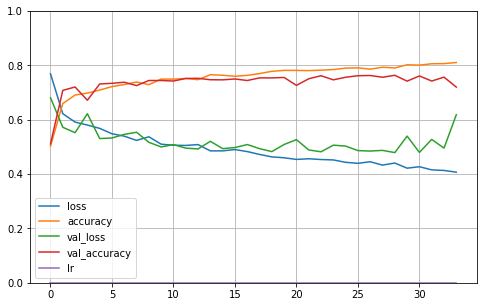

Keras
Matthews Correlation :  0.5572603710899205
Confusion Matrix : 
 [[263  17]
 [ 74  93]]
Accuracy on test set:    0.796420581655481
Sensitivity:    0.5568862275449101 	 Specificity:    0.9392857142857143
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       280
           1       0.85      0.56      0.67       167

    accuracy                           0.80       447
   macro avg       0.81      0.75      0.76       447
weighted avg       0.80      0.80      0.78       447

Area Under Curve:    0.7480859709153121


<Figure size 432x288 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score, classification_report,auc
%matplotlib inline
import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from keras.layers import Dense, Bidirectional,Dense, LSTM, Activation, Dropout, Flatten
from keras.layers import LeakyReLU
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras import regularizers
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

PSSM = pd.read_csv("PSSM_dataframe_nucleus_mitochondrion.csv")
netsurfP = pd.read_csv("netsurfP_df_dataframe_nucleus_mitochondrion.csv")
gd = pd.read_csv("nucleus_mitochondrion_file.csv")

PSSM_train = PSSM.drop(["PID","Position","Sequence","Target"],axis=1)
netsurfp_train = netsurfP.drop(["PID","Position","Sequence","Target"],axis=1)
gd_train = gd.drop(["PID","Position","Sequence","Target"],axis=1)

print(PSSM_train.isnull().sum().sum())
PSSM_train.fillna(0,inplace=True)
print(PSSM_train.isnull().sum().sum())

print(netsurfp_train.isnull().sum().sum())
netsurfp_train.fillna(0,inplace=True)
print(netsurfp_train.isnull().sum().sum())

print(gd_train.isnull().sum().sum())
gd_train.fillna(0,inplace=True)
print(gd_train.isnull().sum().sum())

y_train_PSSM = PSSM["Target"]
y_train_netsurfp = netsurfP["Target"]
y_train_gd = gd["Target"]

print(y_train_PSSM.isnull().sum().sum())
print(y_train_netsurfp.isnull().sum().sum())
print(y_train_gd.isnull().sum().sum())

y_train_PSSM = np.array(y_train_PSSM)
y_train_netsurfp = np.array(y_train_netsurfp)
y_train_gd = np.array(y_train_gd)

train = np.hstack((PSSM_train,netsurfp_train,gd_train))

y_train = y_train_gd

scaler = MinMaxScaler()
scaler.fit(train)
X_train = scaler.transform(train) 

df_test = pd.read_csv("All_feature_Independent_dataframe.csv")

X_test_NetSurfP2 = df_test.iloc[:,2100:2428]

y_test_NetSurfP2 = df_test["Target"]


print(X_test_NetSurfP2.isnull().sum().sum())
X_test_NetSurfP2.fillna(0,inplace=True)
print(X_test_NetSurfP2.isnull().sum().sum())

scaler = MinMaxScaler()


X_test_NetSurfP2 = scaler.fit_transform(X_test_NetSurfP2)


X_test_NetSurfP2 = np.array(X_test_NetSurfP2)
y_test_NetSurfP2 = np.array(y_test_NetSurfP2)

X_test_PSSM_test = df_test.iloc[:,1280:2100]

y_test_PSSM = df_test["Target"]

print(X_test_PSSM_test.isnull().sum().sum())
X_test_PSSM_test.fillna(0,inplace=True)
print(X_test_PSSM_test.isnull().sum().sum())

scaler = MinMaxScaler()


X_test_PSSM_test = scaler.fit_transform(X_test_PSSM_test)


X_test_PSSM_test = np.array(X_test_PSSM_test)
y_test_PSSM = np.array(y_test_PSSM)

X_test_Gapped_Dipeptide = df_test.iloc[:,2428:2468]

y_test_Gapped_Dipeptide = df_test["Target"]


scaler = MinMaxScaler()


X_test_Gapped_Dipeptide = scaler.fit_transform(X_test_Gapped_Dipeptide)


X_test_Gapped_Dipeptide = np.array(X_test_Gapped_Dipeptide)
y_test_Gapped_Dipeptide = np.array(y_test_Gapped_Dipeptide)

X_test_PSSM_NetSurfP2_Gapped_Dipeptide = np.hstack((X_test_PSSM_test,X_test_NetSurfP2,X_test_Gapped_Dipeptide))

y_test_PSSM_NetSurfP2_Gapped_Dipeptide = y_test_Gapped_Dipeptide

X_test = X_test_PSSM_NetSurfP2_Gapped_Dipeptide

y_test = y_test_PSSM_NetSurfP2_Gapped_Dipeptide

activation = 'sigmoid'
dropout_rate = 0.2
neurons = 1024
optimizer = 'Adam'

X_train_1, y_train_1 = shuffle(X_train,y_train, random_state=7)


x_train, x_val, y_train_1, y_val = train_test_split(X_train_1,y_train_1,random_state =7, test_size=0.1)

y_train_1 = keras.utils.to_categorical(y_train_1,2)
y_val = keras.utils.to_categorical(y_val,2)

model = Sequential()
model.add(Dense(neurons, input_dim=1188, kernel_initializer='uniform', activation=activation, kernel_constraint=maxnorm(4)))
model.add(Dropout(dropout_rate))
model.add(Dense(neurons, kernel_initializer='uniform', activation=activation, kernel_constraint=maxnorm(4)))
model.add(Dropout(dropout_rate))
model.add(Dense(neurons, kernel_initializer='uniform', activation=activation, kernel_constraint=maxnorm(4)))
model.add(Dropout(dropout_rate))
model.add(Dense(neurons, kernel_initializer='uniform', activation=activation, kernel_constraint=maxnorm(4)))
model.add(Dropout(dropout_rate))
model.add(Dense(2, kernel_initializer='uniform', activation="softmax"))

model.compile(optimizer=keras.optimizers.Adam(),loss="binary_crossentropy",metrics=["accuracy"])

checkpointer = keras.callbacks.ModelCheckpoint(filepath="ROC_ROC_Premise_Assumption.h5", 
                                monitor = 'val_accuracy',
                                verbose=0, 
                                save_weights_only=False,
                                save_best_only=True)

reduce_lr_acc = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.001, patience=7, verbose=1, min_delta=1e-4, mode='max')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,mode='max')

history = model.fit(x_train, y_train_1,epochs=400,verbose=1,batch_size=256,
                        callbacks=[checkpointer,reduce_lr_acc, early_stopping],validation_data=(x_val, y_val))

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
plt.savefig('accuracy_loss_curve.png', dpi=300, bbox_inches='tight')


print("Keras")

Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)
y_pred = [np.argmax(y, axis=None, out=None) for y in Y_pred]
y_pred = np.array(y_pred)
print("Matthews Correlation : ",matthews_corrcoef(y_test, y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
print("Accuracy on test set:   ",accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

mcc = matthews_corrcoef(y_test, y_pred)

Sensitivity = TP/(TP+FN)

Specificity = TN/(TN+FP)

print("Sensitivity:   ",Sensitivity,"\t","Specificity:   ",Specificity)

print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred)

roc_auc_test = auc(fpr,tpr)

print("Area Under Curve:   ",roc_auc_test)

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              1217536   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)             